# Описание проекта

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В вашем распоряжении данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

# 1. Подготовка данных

In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st
from numpy.random import RandomState
import plotly.express as px
from IPython.display import display
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import fbeta_score, make_scorer

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_classification
from sklearn.utils import shuffle
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve 
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score 
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeRegressor

In [3]:
df_train = pd.read_csv('/datasets/gold_recovery_train.csv')
df_test = pd.read_csv('/datasets/gold_recovery_test.csv')
df_full = pd.read_csv('/datasets/gold_recovery_full.csv')

In [4]:
#display(df_train.head(10))
#display(df_test.head(10)) 
#display(df_full.head(10))

In [5]:
display(df_test.info()) 
#display(df_full.info())
display(df_train.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
date                                          5856 non-null object
primary_cleaner.input.sulfate                 5554 non-null float64
primary_cleaner.input.depressant              5572 non-null float64
primary_cleaner.input.feed_size               5856 non-null float64
primary_cleaner.input.xanthate                5690 non-null float64
primary_cleaner.state.floatbank8_a_air        5840 non-null float64
primary_cleaner.state.floatbank8_a_level      5840 non-null float64
primary_cleaner.state.floatbank8_b_air        5840 non-null float64
primary_cleaner.state.floatbank8_b_level      5840 non-null float64
primary_cleaner.state.floatbank8_c_air        5840 non-null float64
primary_cleaner.state.floatbank8_c_level      5840 non-null float64
primary_cleaner.state.floatbank8_d_air        5840 non-null float64
primary_cleaner.state.floatbank8_d_level      5840 non-null float64
rougher.in

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  16860 non-null object
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
primary_cleaner.input.depressant             

None

Вывод:

Из анализа выборок видно,что тестовый датафрейм(df_test) не содержит столбцы основного датафрейма(df_full) с результатами финального отсеивания и столбцов с даными по драгметаллам.Эти данные становятся доступными после проведения всех этапов технологического процесса обработки сырья.

In [6]:
recovery = (df_train['rougher.output.concentrate_au']*(df_train['rougher.input.feed_au']
                                                     -df_train['rougher.output.tail_au']))/(df_train['rougher.input.feed_au']
                                                                                            *(df_train['rougher.output.concentrate_au']
                                                                                              -df_train['rougher.output.tail_au'])*0.01)

display(recovery)
display(df_train['rougher.output.recovery'])


0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
16855    89.574376
16856    87.724007
16857    88.890579
16858    89.858126
16859    89.514960
Length: 16860, dtype: float64

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
16855    89.574376
16856    87.724007
16857    88.890579
16858    89.858126
16859    89.514960
Name: rougher.output.recovery, Length: 16860, dtype: float64

#### Вывод:
После самостоятельного расчета 'rougher.output.recovery'  расхождений обнаружить не удалось.

In [7]:
df_train_clean = df_train.fillna(method='ffill')
df_test_clean = df_test.fillna(method='ffill')

#заполняем пропуски

In [8]:
target_recovery= df_train_clean[['rougher.output.recovery','final.output.recovery']]
features_recovery= df_train_clean.drop(['rougher.output.recovery','final.output.recovery','date'], axis=1)
model_recovery = LinearRegression()
model_recovery.fit(features_recovery,target_recovery) 
predicted = model_recovery.predict(features_recovery)
result = mean_squared_error(target_recovery, predicted)**0.5
display(result)
display(mean_absolute_error(target_recovery, predicted))



10.74551569517908

5.560694976841757

### Вывод:
Из расчетов видно наличие высокого MAE,что естественно плохо.Постараемся его снизить переработкой данных.

In [9]:
display(df_train_clean.shape ,df_test_clean.shape)




(16860, 87)

(5856, 53)

In [10]:

df_train_clean = df_train_clean.loc[df_train_clean['final.output.concentrate_ag'] != 0] 
df_train_clean = df_train_clean.loc[df_train_clean['final.output.concentrate_pb'] != 0] 
df_train_clean = df_train_clean.loc[df_train_clean['final.output.concentrate_au'] != 0] 
#df_train_clean = df_train_clean.loc[df_train_clean['final.output.recovery'] < 100] 
#display(df_train.info())
display(df_train_clean)


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16855,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
16856,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
16857,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
16858,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


#### Вывод:
 На этапе переработки я посчитал, что выходящий концентрат металлов не может быть меньше 0 следоватльно строки со значением 0 нужно отсеять.

# 2. Анализ данных

#### 2.1. Изучим концентрация металлов (Au, Ag, Pb) на различных этапах очистки

In [11]:
df_concetrate_ag= df_train_clean[['rougher.output.concentrate_ag','primary_cleaner.output.concentrate_ag',
                           'secondary_cleaner.output.tail_ag',
                          'final.output.concentrate_ag','date']]
df_concetrate_pb= df_train_clean[['rougher.output.concentrate_pb','primary_cleaner.output.concentrate_pb',
                           'secondary_cleaner.output.tail_pb','final.output.concentrate_pb','date']]
df_concetrate_au= df_train_clean[['rougher.output.concentrate_au','primary_cleaner.output.concentrate_au',
                          'secondary_cleaner.output.tail_au','final.output.concentrate_au','date']]


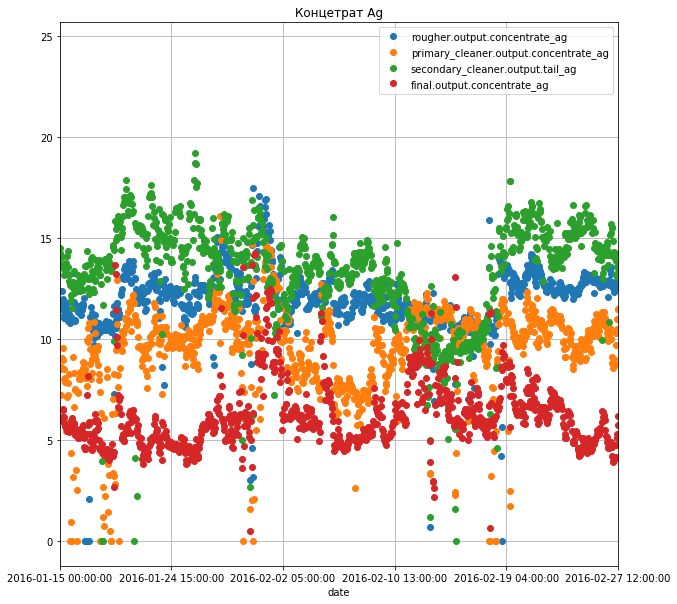

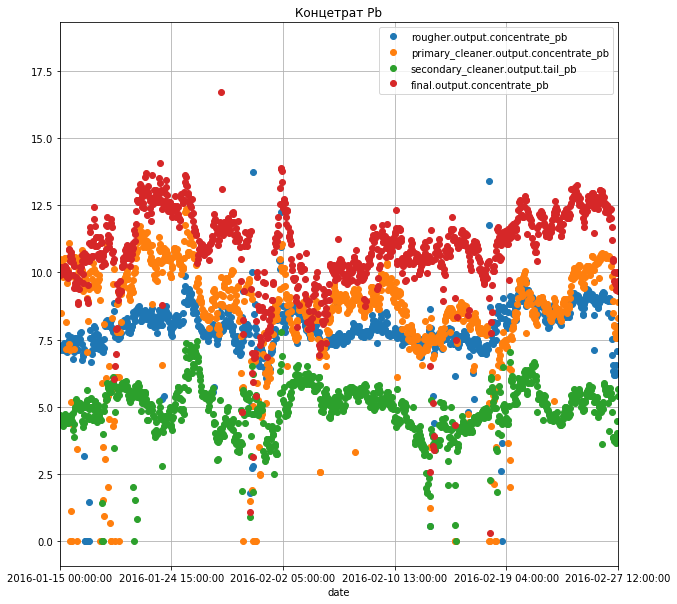

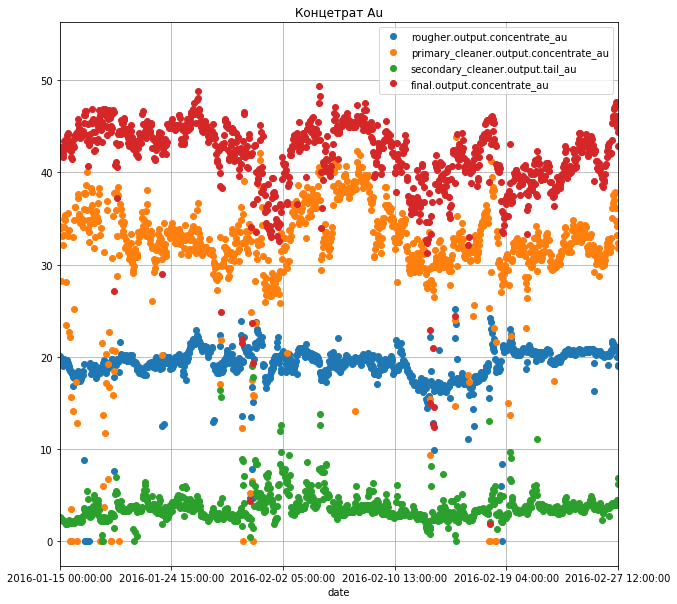

In [12]:
df_concetrate_ag.plot(x = 'date', style='o', xlim=(0, 1000), grid=True, figsize=(10, 10),title='Концетрат Ag')

df_concetrate_pb.plot(x = 'date',style='o', xlim=(0, 1000), grid=True, figsize=(10, 10),title='Концетрат Pb')
df_concetrate_au.plot(x = 'date',style='o', xlim=(0, 1000), grid=True, figsize=(10, 10),title='Концетрат Au')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f70348fa810>,
      dtype=object)

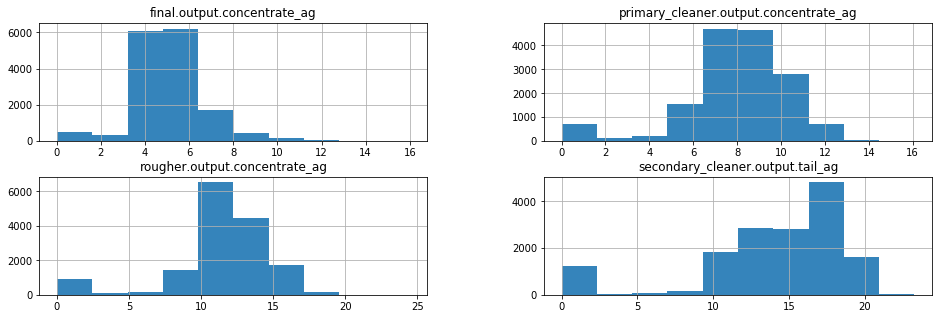

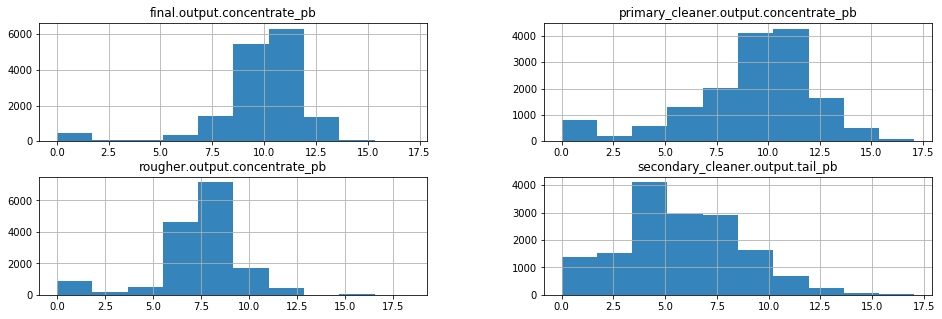

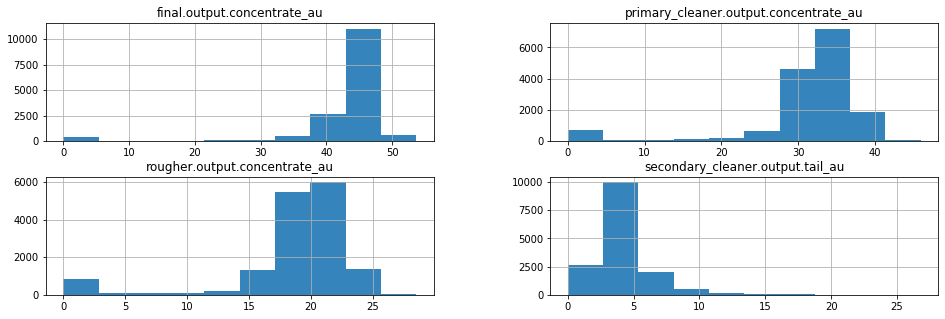

In [13]:

df_concetrate_ag.hist(figsize=(16,5), alpha=0.9)
df_concetrate_pb.hist(figsize=(16,5), alpha=0.9)
df_concetrate_au.hist(figsize=(16,5), alpha=0.9)
#df_concetrate_ag.plot(figsize=(16,5), alpha=0.9)
#df_concetrate_pb.plot(figsize=(16,5), alpha=0.9)
#df_concetrate_au.plot(figsize=(16,5), alpha=0.9)




### Вывод:
Металлы Ag и Pd имеют схожую концетрацию по стадиям обработки схожи.Концетрация Au на выходе в 2 раза больше чем на входе, что может сведетельствовать о наличие выбросов на этом этапею

#### 2.2.Сравните распределения размеров гранул сырья

,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_au
count,5840.000000,5840.000000,5816.000000,5834.000000,5840.000000
mean,8.736170,3.552722,458.485472,55.937535,8.700930
std,2.985805,1.326113,155.958272,22.724254,2.803046
min,0.000000,0.000000,0.002986,0.046369,0.000000
25%,7.598683,3.079145,399.781738,43.890852,7.763634
50%,9.628324,3.679706,489.533016,50.002004,9.449623
75%,10.568373,4.241195,568.111571,61.638434,10.377337
max,14.406130,6.905684,707.364020,477.445473,13.731330


,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_au
count,16778.000000,16632.000000,16347.000000,16443.000000,16777.000000
mean,7.832347,3.218931,435.963431,58.676444,7.170717
std,3.139014,1.477263,156.592162,23.922591,3.002113
min,0.000000,0.000000,0.000044,9.659576,0.000000
25%,6.889426,2.551143,396.667936,47.575879,6.203083
50%,7.938193,3.297050,488.629971,54.104257,7.443530
75%,9.829857,4.181842,540.548376,65.051064,8.965193
max,14.869652,7.142594,717.508837,484.967466,14.093363


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f70346a89d0>,
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7031b32a50>,
      dtype=object)

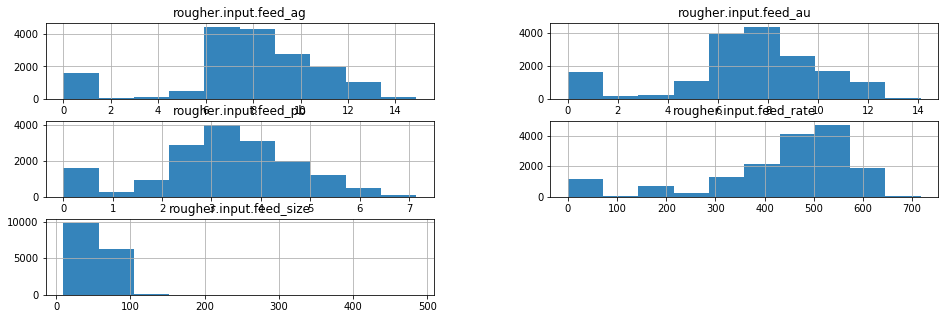

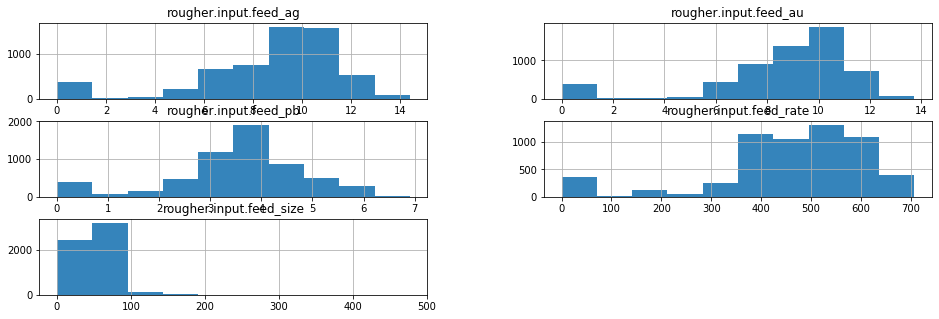

In [14]:
display(df_test[['rougher.input.feed_ag','rougher.input.feed_pb',
         'rougher.input.feed_rate','rougher.input.feed_size','rougher.input.feed_au']].describe())
display(df_train[['rougher.input.feed_ag','rougher.input.feed_pb',
         'rougher.input.feed_rate','rougher.input.feed_size','rougher.input.feed_au']].describe())
display(df_train[['rougher.input.feed_ag','rougher.input.feed_pb',
         'rougher.input.feed_rate','rougher.input.feed_size','rougher.input.feed_au']].hist(figsize=(16,5), alpha=0.9))
display(df_test[['rougher.input.feed_ag','rougher.input.feed_pb',
         'rougher.input.feed_rate','rougher.input.feed_size','rougher.input.feed_au']].hist(figsize=(16,5), alpha=0.9))





#### Вывод:
Приминив describe() и построив гистограммы критических отличий обнаружить не удалосью Небольшие расхождения могут быть из-за размеров выборокю

#### 2.3.Исследуем суммарную концентрацию всех веществ на разных стадиях

In [15]:
df_train_concetrate_sum = df_train_clean[['primary_cleaner.output.concentrate_ag','primary_cleaner.output.concentrate_pb'
                           ,'primary_cleaner.output.concentrate_au','rougher.output.concentrate_ag',
                                   'rougher.output.concentrate_pb','rougher.output.concentrate_au',
                                  'final.output.concentrate_ag','final.output.concentrate_pb',
                         'final.output.concentrate_au']].sum()
#df_test_concetrate = df_train_clean[['final.output.concentrate_ag','final.output.concentrate_pb',
#                         'final.output.concentrate_au']]
df_train_concetrate = df_train_clean[['primary_cleaner.output.concentrate_ag','primary_cleaner.output.concentrate_pb'
                           ,'primary_cleaner.output.concentrate_au','rougher.output.concentrate_ag',
                                   'rougher.output.concentrate_pb','rougher.output.concentrate_au',
                                  'final.output.concentrate_ag','final.output.concentrate_pb',
                         'final.output.concentrate_au']]
display(df_train_concetrate)

,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_au
0,8.547551,10.389648,34.174427,11.500771,7.101074,19.793808,6.055403,9.889648,42.192020
1,8.558743,10.497069,34.118526,11.615865,7.278807,20.050975,6.029369,9.968944,42.701629
2,8.603505,10.354494,33.969464,11.695753,7.216833,19.737170,6.055926,10.213995,42.657501
3,7.221879,8.496563,28.260743,11.915047,7.175616,19.320810,6.047977,9.977019,42.689819
4,9.089428,9.986786,33.044932,12.411054,7.240205,19.216101,6.148599,10.142511,42.774141
...,...,...,...,...,...,...,...,...,...
16855,6.559174,12.445966,32.940215,11.124896,10.984003,18.603550,3.224920,11.356233,46.713954
16856,6.612376,12.623947,32.925325,11.425983,10.888213,18.441436,3.195978,11.349355,46.866780
16857,7.128896,12.633558,31.856742,8.523497,8.955135,15.111231,3.109998,11.434366,46.795691
16858,7.490444,12.012378,30.770892,11.658799,10.655377,17.834772,3.367241,11.625587,46.408188


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f70317f81d0>,
      dtype=object)

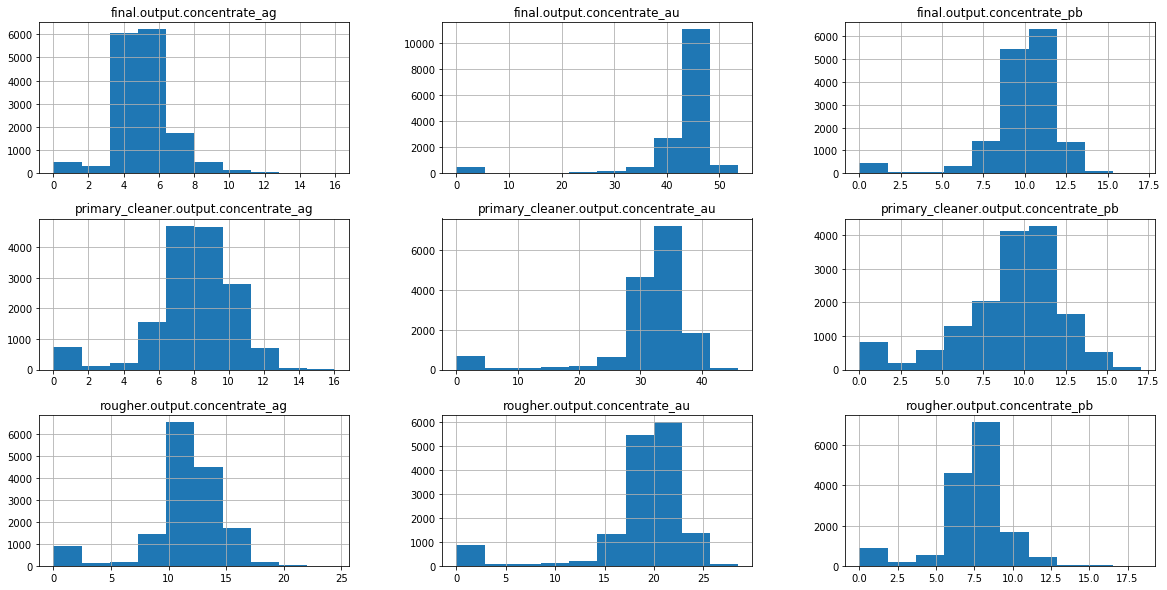

In [16]:

df_train_concetrate.hist(figsize=(20,10), alpha=1)

In [17]:
df_train_clean = df_train_clean.loc[df_train_clean['rougher.output.concentrate_ag'] != 0] 
df_train_clean = df_train_clean.loc[df_train_clean['rougher.output.concentrate_au'] != 0] 
df_train_clean = df_train_clean.loc[df_train_clean['rougher.output.concentrate_pb'] != 0] 




#df_train_clean.query('rougher.output.concentrate_ag != 0')#and rougher.input.feed_pb and rougher.output.concentrate_au !=0')

In [18]:
df_train_clean = df_train_clean.loc[df_train_clean['primary_cleaner.output.concentrate_ag'] != 0] 
df_train_clean = df_train_clean.loc[df_train_clean['primary_cleaner.output.concentrate_pb'] != 0] 
df_train_clean = df_train_clean.loc[df_train_clean['primary_cleaner.output.concentrate_au'] != 0] 

In [19]:
df_train_clean = df_train_clean.loc[df_train_clean['final.output.concentrate_ag'] != 0] 
df_train_clean = df_train_clean.loc[df_train_clean['final.output.concentrate_pb'] != 0] 
df_train_clean = df_train_clean.loc[df_train_clean['final.output.concentrate_au'] != 0] 

#### Вывод:
Вбросы в районе нуля следует считать аномальным и их необходимо удалить.

# 3. Модель

In [33]:
features_train_1 = df_train_1[features_1].reset_index(drop=True)
target_train_1 = df_train_clean[targets_1].reset_index(drop=True)

features_test_1 = df_test_1[features_1].reset_index(drop=True)
target_test_1 = df_full_1[targets_1].loc[df_test_1.index].reset_index(drop=True)
target_test_1 =  target_test_1.fillna(method='ffill')

In [34]:

model = RandomForestRegressor(n_estimators=80,max_depth=11, random_state=12345) 
model.fit(features_train_1 , target_train_1)
predictions_train_1 = model.predict(features_train_1) 
final_score = cross_val_score(model, features_train_1, target_train_1, cv=3)
display(final_score)

array([ 0.04492473, -0.13804975, -0.47701978])

In [35]:
model_line = LinearRegression()
model_line.fit(features_train_1,target_train_1) 
predicted = model_line.predict(features_train_1)
final_score = cross_val_score(model_line, features_train_1, target_train_1, cv=3) 
display(final_score)


array([-0.24973913, -0.24557183, -1.52659514])

In [36]:
model_tree = DecisionTreeRegressor(random_state=12345, max_depth = 10)
final_score = cross_val_score(model_tree, features_train_1, target_train_1, cv=10)
display(final_score)

array([-0.48724531, -1.41224265, -0.21183587, -5.55543446, -1.02427317,
       -0.75570188, -0.21038215, -2.14689732, -0.12977695, -0.77637352])

In [48]:
target_rougher=  targets_1[0]
target_final =  targets_1[1]

TestModels = pd.DataFrame() 
tmp = {}
for model in models:
    #получаем имя модели
    m = str(model)    
    tmp['model'] = m[:m.index('(')]     
    tmp['smape_rougher'] = calc_smape(model, features_train_1, target_train_1[target_rougher])    
    tmp['smape_final'] = calc_smape(model, features_train_1, target_train_1[target_final])
    tmp['ismape'] = ismape(tmp['smape_rougher'], tmp['smape_final'])
    TestModels = TestModels.append([tmp])    
#делаем индекс по названию модели
TestModels.set_index('model', inplace=True)
TestModels

,smape_rougher,smape_final,ismape
model,,,
LinearRegression,20.705598,15.722898,16.968573
RandomForestRegressor,18.025883,15.976778,16.489054
DecisionTreeRegressor,23.301808,21.495548,21.947113


In [49]:
target_rougher=  targets_1[0]
target_final =  targets_1[1]

TestModels = pd.DataFrame() 
tmp = {}
for model in models:
    #получаем имя модели
    m = str(model)    
    tmp['model'] = m[:m.index('(')]     
    tmp['smape_rougher'] = calc_smape(model, features_test_1, target_test_1[target_rougher])    
    tmp['smape_final'] = calc_smape(model, features_test_1, target_test_1[target_final])
    tmp['ismape'] = ismape(tmp['smape_rougher'], tmp['smape_final'])
    TestModels = TestModels.append([tmp])    
#делаем индекс по названию модели
TestModels.set_index('model', inplace=True)
TestModels

,smape_rougher,smape_final,ismape
model,,,
LinearRegression,13.376789,12.952299,13.058421
RandomForestRegressor,17.372341,15.848348,16.229347
DecisionTreeRegressor,26.471459,26.372971,26.397593


In [46]:
model = RandomForestRegressor(n_estimators=80,max_depth=11, random_state=12345) 
model.fit(features_test_1, target_test_1)
predictions_train = model.predict(features_test_1) 
final_score = cross_val_score(model, features_test_1, target_test_1, cv=3)
display(final_score)

array([-0.17741809, -0.47567043, -0.44117004])

#### Вывод:
- лучше справилась модель RandomForestRegressor.

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке выполнения
- [ ]  Выполнен шаг 1: данные подготовлены
    - [ ]  Проверена формула вычисления эффективности обогащения
    - [ ]  Проанализированы признаки, недоступные в тестовой выборке
    - [ ]  Проведена предобработка данных
- [ ]  Выполнен шаг 2: данные проанализированы
    - [ ]  Исследовано изменение концентрации элементов на каждом этапе
    - [ ]  Проанализированы распределения размеров гранул на обучающей и тестовой выборках
    - [ ]  Исследованы суммарные концентрации
    - [ ]  Проанализированы и обработаны аномальные значения
- [ ]  Выполнен шаг 3: построена модель прогнозирования
    - [ ]  Написана функция для вычисления итогового *sMAPE*
    - [ ]  Обучено и проверено несколько моделей
    - [ ]  Выбрана лучшая модель, её качество проверено на тестовой выборке